In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your prevalence estimate files (using full paths)
obesity_2223 = pd.read_csv(r'/Users/carolinechizak/Library/CloudStorage/OneDrive-SharedLibraries-Emory/Varghese, Jithin Sam - Pursuant User Profiles/working/model/ktana07/glmer_20222023_county_obesity estimates.csv')
overweight_2223 = pd.read_csv(r'/Users/carolinechizak/Library/CloudStorage/OneDrive-SharedLibraries-Emory/Varghese, Jithin Sam - Pursuant User Profiles/working/model/ktana07/glmer_20222023_county_overweight estimates.csv')
obesity_2425 = pd.read_csv(r'/Users/carolinechizak/Library/CloudStorage/OneDrive-SharedLibraries-Emory/Varghese, Jithin Sam - Pursuant User Profiles/working/model/ktana07/glmer_20242025_county_obesity estimates.csv')
overweight_2425 = pd.read_csv(r'/Users/carolinechizak/Library/CloudStorage/OneDrive-SharedLibraries-Emory/Varghese, Jithin Sam - Pursuant User Profiles/working/model/ktana07/glmer_20242025_county_overweight estimates.csv')

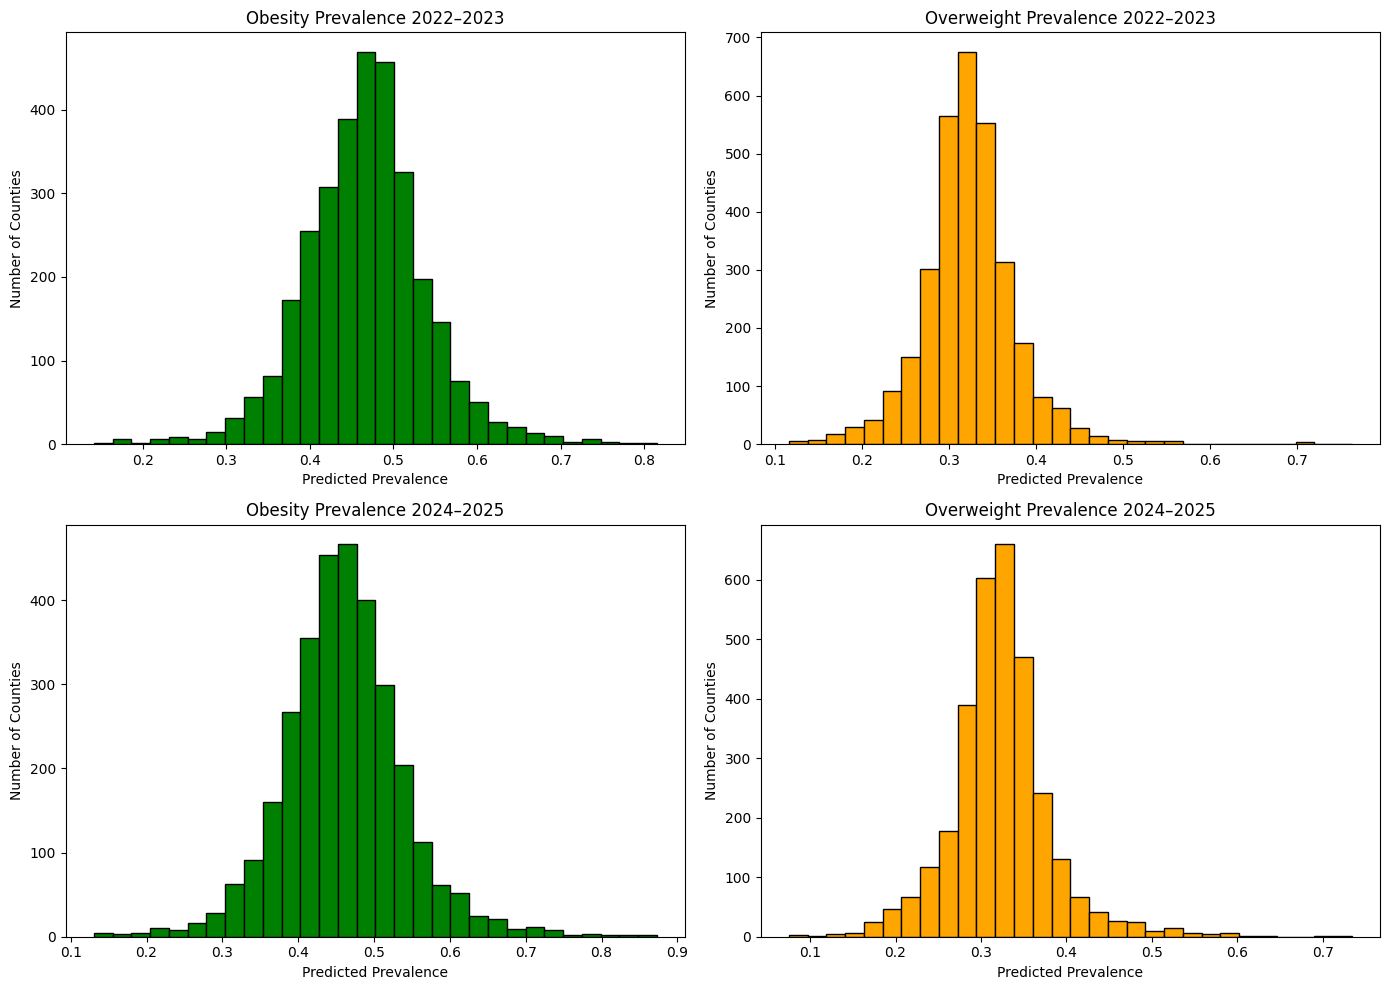

In [5]:
# Set up 2x2 subplot
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Top row: 2022–2023
axs[0, 0].hist(obesity_2223['prevalence'], bins=30, color='green', edgecolor='black')
axs[0, 0].set_title('Obesity Prevalence 2022–2023')
axs[0, 0].set_xlabel('Predicted Prevalence')
axs[0, 0].set_ylabel('Number of Counties')

axs[0, 1].hist(overweight_2223['prevalence'], bins=30, color='orange', edgecolor='black')
axs[0, 1].set_title('Overweight Prevalence 2022–2023')
axs[0, 1].set_xlabel('Predicted Prevalence')
axs[0, 1].set_ylabel('Number of Counties')

# Bottom row: 2024–2025
axs[1, 0].hist(obesity_2425['prevalence'], bins=30, color='green', edgecolor='black')
axs[1, 0].set_title('Obesity Prevalence 2024–2025')
axs[1, 0].set_xlabel('Predicted Prevalence')
axs[1, 0].set_ylabel('Number of Counties')

axs[1, 1].hist(overweight_2425['prevalence'], bins=30, color='orange', edgecolor='black')
axs[1, 1].set_title('Overweight Prevalence 2024–2025')
axs[1, 1].set_xlabel('Predicted Prevalence')
axs[1, 1].set_ylabel('Number of Counties')

plt.tight_layout()
plt.show()

In [8]:
# Load PLACES 2024 dataset and filter for adult obesity, age-adjusted
places_2024 = pd.read_csv('/Users/carolinechizak/Downloads/PLACES__Local_Data_for_Better_Health__County_Data_2024_release_20250729.csv')

places_obesity = places_2024[
    (places_2024['Measure'] == 'Obesity among adults') &
    (places_2024['Data_Value_Type'] == 'Age-adjusted prevalence')
].copy()

places_obesity['obesity_prev'] = places_obesity['Data_Value']

/var/folders/5c/j1qyt58n48724qt7xyp0z9140000gn/T/ipykernel_7387/116988018.py:2: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  places_2024 = pd.read_csv('/Users/carolinechizak/Downloads/PLACES__Local_Data_for_Better_Health__County_Data_2024_release_20250729.csv')


In [13]:
import pandas as pd

# Load Cosmos data
cosmos = pd.read_csv("/Users/carolinechizak/kiosk_user_patterns/data/kupdat08_cosmos county estimates.csv")

# Ensure FIPS is a string, pad with zeros if necessary
cosmos['FIPS'] = cosmos['fips'].astype(str).str.zfill(5)

# If there are duplicate rows for the same FIPS, average them (optional safety)
cosmos_2425 = (
    cosmos.groupby('FIPS', as_index=False)
    .agg({'Obesity': 'mean'})
    .rename(columns={'Obesity': 'cosmos_prev'})
)

print(cosmos_2425.head())

    FIPS  cosmos_prev
0  01001         29.7
1  01003         36.4
2  01005         30.5
3  01007         32.0
4  01009         37.3


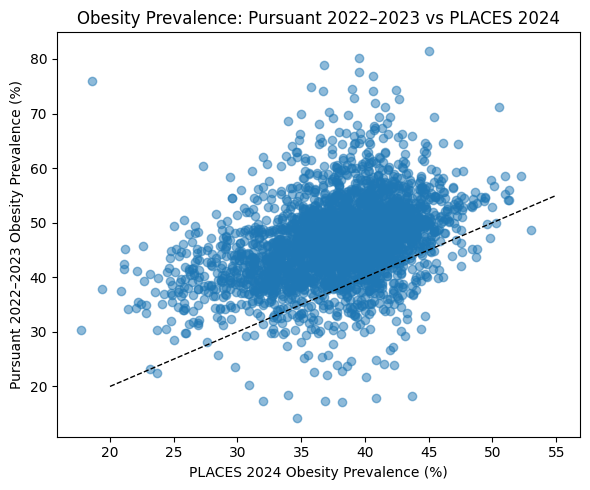

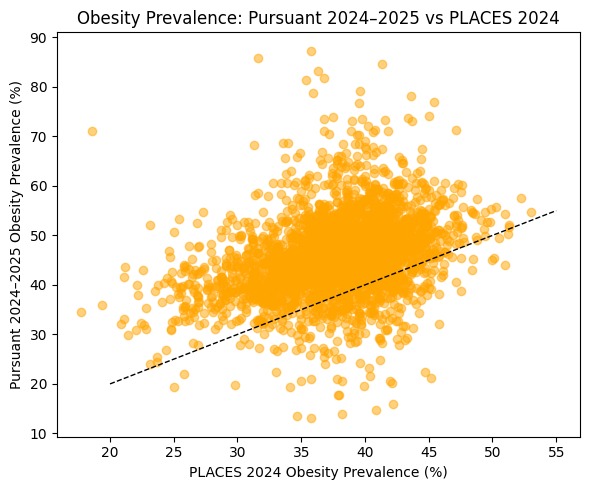

Spearman (2022–2023): r=0.398, p=4.35e-120
Spearman (2024–2025): r=0.365, p=1.97e-99


In [10]:
from scipy.stats import spearmanr

# Make sure FIPS columns are 5-char strings
places_obesity['FIPS'] = places_obesity['LocationID'].astype(str).str.zfill(5)
obesity_2223['FIPS'] = obesity_2223['FIPS'].astype(str).str.zfill(5)
obesity_2425['FIPS'] = obesity_2425['FIPS'].astype(str).str.zfill(5)

# Merge datasets on FIPS
merge_2223 = pd.merge(
    obesity_2223[['FIPS', 'prevalence']], 
    places_obesity[['FIPS', 'obesity_prev']], 
    on='FIPS', how='inner'
)
merge_2425 = pd.merge(
    obesity_2425[['FIPS', 'prevalence']], 
    places_obesity[['FIPS', 'obesity_prev']], 
    on='FIPS', how='inner'
)

# Convert prevalence to percent if needed
merge_2223['prevalence'] = merge_2223['prevalence'] * 100
merge_2425['prevalence'] = merge_2425['prevalence'] * 100

# Scatterplot for 2022–2023 vs PLACES 2024, save as JPG
plt.figure(figsize=(6,5))
plt.scatter(merge_2223['obesity_prev'], merge_2223['prevalence'], alpha=0.5)
plt.xlabel('PLACES 2024 Obesity Prevalence (%)')
plt.ylabel('Pursuant 2022–2023 Obesity Prevalence (%)')
plt.title('Obesity Prevalence: Pursuant 2022–2023 vs PLACES 2024')
plt.plot([20,55], [20,55], 'k--', lw=1)
plt.tight_layout()
plt.savefig('/Users/carolinechizak/Library/CloudStorage/OneDrive-SharedLibraries-Emory/Varghese, Jithin Sam - Pursuant User Profiles/figures/figure3_obesity_corr_2223_vs_places2024.jpg', dpi=300, bbox_inches='tight')
plt.show()

# Scatterplot for 2024–2025 vs PLACES 2024, save as JPG
plt.figure(figsize=(6,5))
plt.scatter(merge_2425['obesity_prev'], merge_2425['prevalence'], alpha=0.5, color='orange')
plt.xlabel('PLACES 2024 Obesity Prevalence (%)')
plt.ylabel('Pursuant 2024–2025 Obesity Prevalence (%)')
plt.title('Obesity Prevalence: Pursuant 2024–2025 vs PLACES 2024')
plt.plot([20,55], [20,55], 'k--', lw=1)
plt.tight_layout()
plt.savefig('/Users/carolinechizak/Library/CloudStorage/OneDrive-SharedLibraries-Emory/Varghese, Jithin Sam - Pursuant User Profiles/figures/figure3_obesity_corr_2425_vs_places2024.jpg', dpi=300, bbox_inches='tight')
plt.show()

# Spearman correlations
rho_2223, pval_2223 = spearmanr(merge_2223['obesity_prev'], merge_2223['prevalence'])
rho_2425, pval_2425 = spearmanr(merge_2425['obesity_prev'], merge_2425['prevalence'])
print(f"Spearman (2022–2023): r={rho_2223:.3f}, p={pval_2223:.2e}")
print(f"Spearman (2024–2025): r={rho_2425:.3f}, p={pval_2425:.2e}")

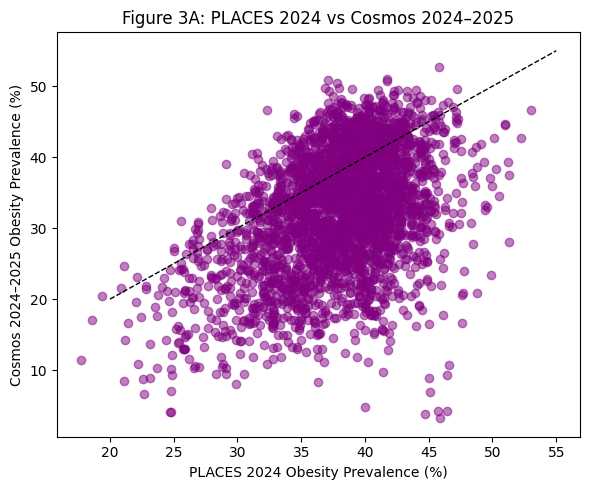

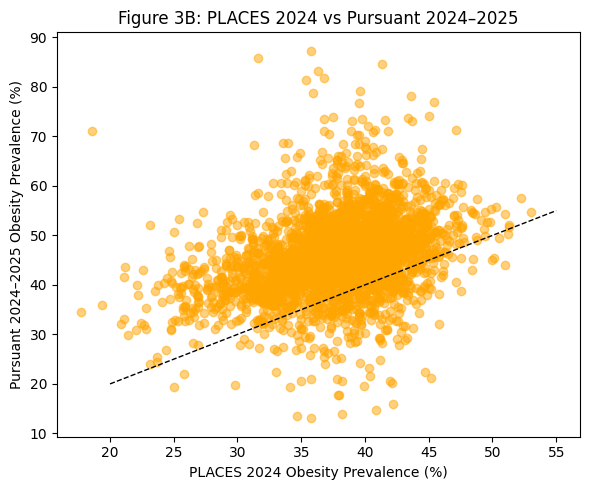

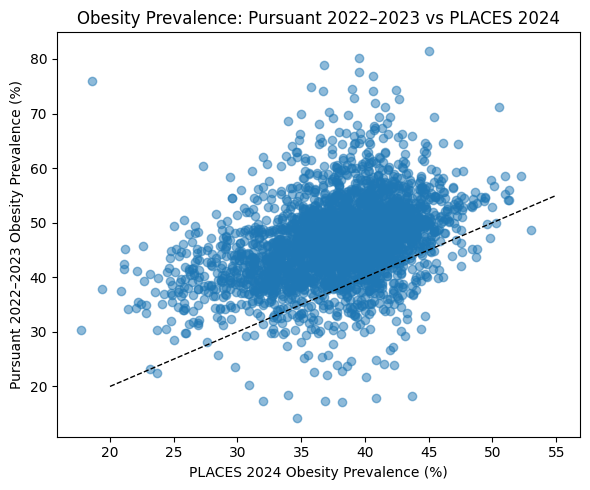

Spearman (Cosmos 2024–2025): r=nan, p=nan
Spearman (Pursuant 2024–2025): r=0.365, p=1.97e-99
Spearman (Pursuant 2022–2023): r=0.398, p=4.35e-120


In [14]:
from scipy.stats import spearmanr
import matplotlib.pyplot as plt

# --- Merge Cosmos with PLACES 2024 ---
places_obesity['FIPS'] = places_obesity['LocationID'].astype(str).str.zfill(5)
merge_cosmos = pd.merge(
    cosmos_2425[['FIPS', 'cosmos_prev']],
    places_obesity[['FIPS', 'obesity_prev']],
    on='FIPS', how='inner'
)

# --- Merge Pursuant 2024-2025 with PLACES 2024 ---
obesity_2425['FIPS'] = obesity_2425['FIPS'].astype(str).str.zfill(5)
merge_2425 = pd.merge(
    obesity_2425[['FIPS', 'prevalence']],
    places_obesity[['FIPS', 'obesity_prev']],
    on='FIPS', how='inner'
)
merge_2425['prevalence'] = merge_2425['prevalence'] * 100

# --- Merge Pursuant 2022-2023 with PLACES 2024 (for reference, not saving) ---
obesity_2223['FIPS'] = obesity_2223['FIPS'].astype(str).str.zfill(5)
merge_2223 = pd.merge(
    obesity_2223[['FIPS', 'prevalence']],
    places_obesity[['FIPS', 'obesity_prev']],
    on='FIPS', how='inner'
)
merge_2223['prevalence'] = merge_2223['prevalence'] * 100

# --- 3A: Scatterplot PLACES 2024 vs Cosmos 2024-2025 ---
plt.figure(figsize=(6,5))
plt.scatter(merge_cosmos['obesity_prev'], merge_cosmos['cosmos_prev'], alpha=0.5, color='purple')
plt.xlabel('PLACES 2024 Obesity Prevalence (%)')
plt.ylabel('Cosmos 2024–2025 Obesity Prevalence (%)')
plt.title('Figure 3A: PLACES 2024 vs Cosmos 2024–2025')
plt.plot([20,55], [20,55], 'k--', lw=1)
plt.tight_layout()
plt.savefig('/Users/carolinechizak/Library/CloudStorage/OneDrive-SharedLibraries-Emory/Varghese, Jithin Sam - Pursuant User Profiles/figures/figure3A_obesity_corr_cosmos2425_vs_places2024.jpg', dpi=300, bbox_inches='tight')
plt.show()

# --- 3B: Scatterplot PLACES 2024 vs Pursuant 2024-2025 ---
plt.figure(figsize=(6,5))
plt.scatter(merge_2425['obesity_prev'], merge_2425['prevalence'], alpha=0.5, color='orange')
plt.xlabel('PLACES 2024 Obesity Prevalence (%)')
plt.ylabel('Pursuant 2024–2025 Obesity Prevalence (%)')
plt.title('Figure 3B: PLACES 2024 vs Pursuant 2024–2025')
plt.plot([20,55], [20,55], 'k--', lw=1)
plt.tight_layout()
plt.savefig('/Users/carolinechizak/Library/CloudStorage/OneDrive-SharedLibraries-Emory/Varghese, Jithin Sam - Pursuant User Profiles/figures/figure3B_obesity_corr_2425_vs_places2024.jpg', dpi=300, bbox_inches='tight')
plt.show()

# --- (Optional) Scatterplot PLACES 2024 vs Pursuant 2022-2023 (not saving) ---
plt.figure(figsize=(6,5))
plt.scatter(merge_2223['obesity_prev'], merge_2223['prevalence'], alpha=0.5)
plt.xlabel('PLACES 2024 Obesity Prevalence (%)')
plt.ylabel('Pursuant 2022–2023 Obesity Prevalence (%)')
plt.title('Obesity Prevalence: Pursuant 2022–2023 vs PLACES 2024')
plt.plot([20,55], [20,55], 'k--', lw=1)
plt.tight_layout()
plt.show()

# --- Spearman correlations ---
rho_cosmos, pval_cosmos = spearmanr(merge_cosmos['obesity_prev'], merge_cosmos['cosmos_prev'])
rho_2425, pval_2425 = spearmanr(merge_2425['obesity_prev'], merge_2425['prevalence'])
rho_2223, pval_2223 = spearmanr(merge_2223['obesity_prev'], merge_2223['prevalence'])
print(f"Spearman (Cosmos 2024–2025): r={rho_cosmos:.3f}, p={pval_cosmos:.2e}")
print(f"Spearman (Pursuant 2024–2025): r={rho_2425:.3f}, p={pval_2425:.2e}")
print(f"Spearman (Pursuant 2022–2023): r={rho_2223:.3f}, p={pval_2223:.2e}")